In [1]:
# 1.Import and preprocess the dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv('advertising_and_sales.csv')

df.isnull().sum()
df['influencer'] = LabelEncoder().fit_transform(df['influencer'])

df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,1,54732.76
1,13000.0,9237.76,2409.57,1,46677.90
2,41000.0,15886.45,2913.41,1,150177.83
3,83000.0,30020.03,6922.30,1,298246.34
4,15000.0,8437.41,1406.00,2,56594.18


In [2]:
#2.Split data into train-test sets.
# Features and Target
X = df[['tv', 'radio', 'social_media', 'influencer']]
y = df['sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# 3.Fit a Linear Regression model using sklearn.linear_model.
# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [4]:
#4.Evaluate model using MAE, MSE, R².
# Evaluation
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R² Score:', r2_score(y_test, y_pred))

# Coefficients
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coef_df)

MAE: 2312.3468123944044
MSE: 8322554.752420081
R² Score: 0.9990104456045058
              Coefficient
tv               3.563345
radio           -0.002593
social_media    -0.014448
influencer     -34.808697


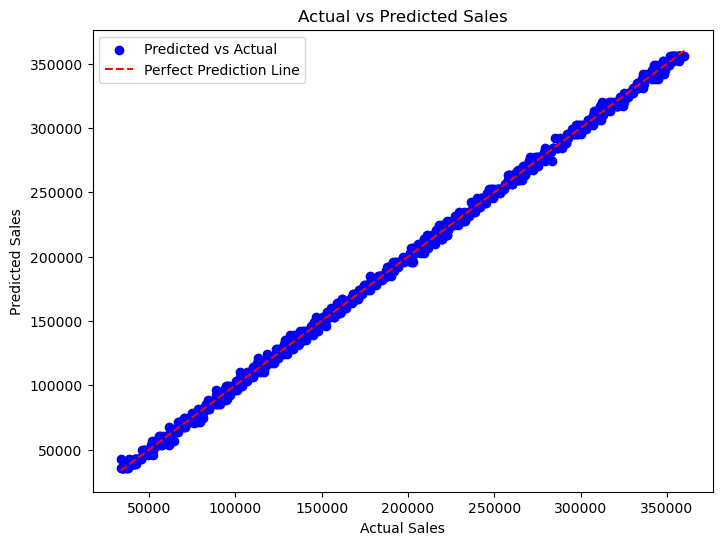

In [5]:
# 5.Plot regression line and interpret coefficients.
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

--- Evaluation for tv ---
MAE: 2310.8516560971834
MSE: 8313211.567947682
R² Score: 0.9990115565120982
Regression Line: Sales = -168.97 + 3.56 * tv


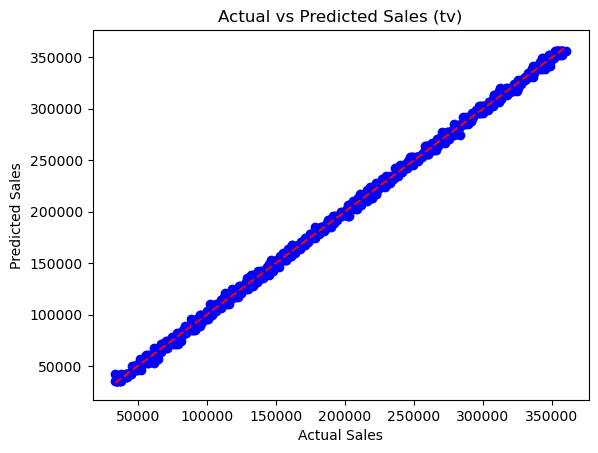

--- Evaluation for radio ---
MAE: 36213.62442232663
MSE: 2048159781.4803925
R² Score: 0.7564731534089224
Regression Line: Sales = 39505.90 + 8.38 * radio


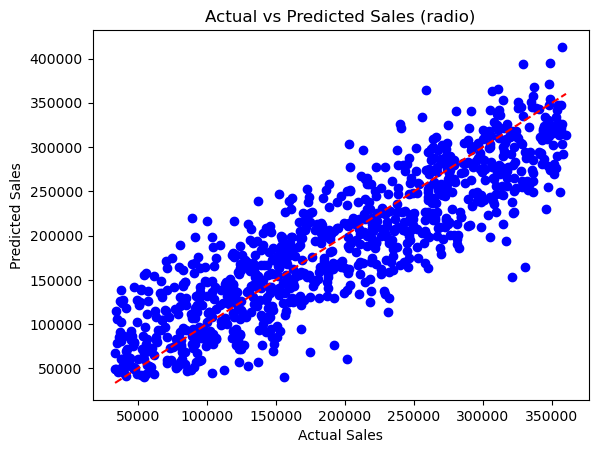

--- Evaluation for social_media ---
MAE: 63991.23442853316
MSE: 5965956885.755868
R² Score: 0.2906458370956151
Regression Line: Sales = 118076.93 + 22.27 * social_media


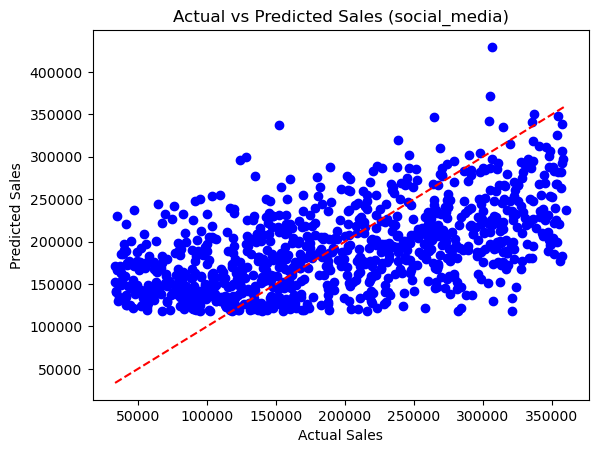

In [6]:
# Simple Linear Regression for each feature.
def simple_linear_regression(feature_name):
    X = df[[feature_name]]  # Use only one feature
    y = df['sales']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation Metrics
    print(f"--- Evaluation for {feature_name} ---")
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('R² Score:', r2_score(y_test, y_pred))
    
    # Regression Line
    intercept = model.intercept_
    coef = model.coef_[0]
    print(f"Regression Line: Sales = {intercept:.2f} + {coef:.2f} * {feature_name}")
    
    # Plotting Actual vs Predicted
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.title(f'Actual vs Predicted Sales ({feature_name})')
    plt.show()

# Running Simple Linear Regression for each feature:
simple_linear_regression('tv')
simple_linear_regression('radio')
simple_linear_regression('social_media')